D:\Python\Anaconda3\envs\PyTorch\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
D:\Python\Anaconda3\envs\PyTorch\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Text(0.5, 1.0, 'Model (b)')

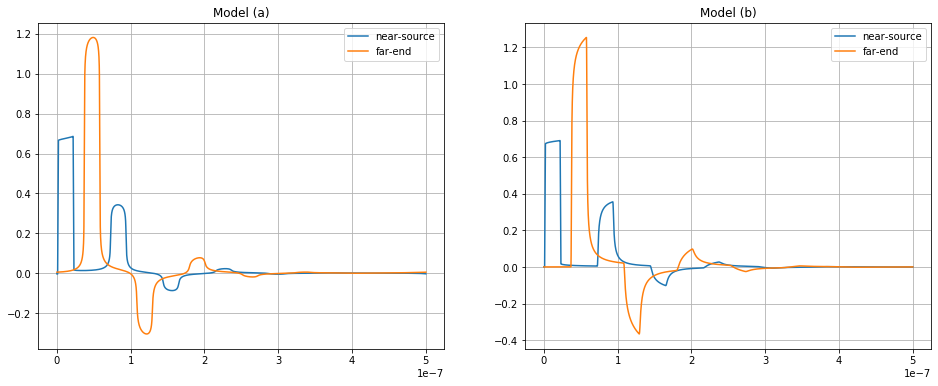

In [353]:
import numpy as np
from numpy.linalg import*
import matplotlib.pyplot as plt
from numpy import r_, exp, cos, sin, pi, zeros, ones, hanning, sqrt, log, floor, reshape, mean
from scipy import signal
from numpy.fft import fft
import math
#%matplotlib inline

# Pulse function define
def v_s(t,delay, td, tr, tf, tw, Vmax):
    t_new = (t-delay)*1e9
    v_s = np.zeros_like(t_new)
    td = td*1e9
    tr = tr*1e9
    tf = tf*1e9
    tw = tw*1e9
    for k,tk in enumerate(t_new):
        if tk >= td and tk <= td+tr:
            v_s[k] = (Vmax/tr)*(tk-td)
        elif tk > td+tr and tk <= td+tr+tw:
            v_s[k] = Vmax
        elif tk >td+tr+tw and tk <= td+tr+tw+tf:
            v_s[k] = -(Vmax/tr)*(tk-(td+tr+tw+tf))
    return v_s


# Input Pulse information
td = 1e-9
tr = 1e-9
tf = 1e-9
tw = 20e-9
Vmax = 1

ts = 0.1e-9
tmin = 0
tmax = 500e-9
Ns = (tmax-tmin)/ts

t = np.linspace(0,ts*Ns,Ns)
f = np.linspace(1e-30,fs/2,Ns)
f = f[:int(Ns/2+1)]

fs = 1/ts

v_st=v_s(t,0,td,tr,tf,tw,Vmax)

V_sf=np.fft.rfft(v_st,Ns)

# Characteristic impedance
R_0 = 5
Rskin1 = R_0*np.sqrt(f*1e-9)
Rskin2 = R_0*np.sqrt(f*1e-9)*(1+1j)

R=Rskin1
L=145e-9
C=14e-12
G=0

Z_0 = np.sqrt(np.divide(R+2j*pi*f*L,G+2j*pi*f*C))
Z_0[0] = np.sqrt(L/C)
Z_1 = 50
Z_2 = 10000
T = Z_0/(Z_0+Z_1)
G_1 = (Z_1-Z_0)/(Z_1+Z_0)
G_2 = (Z_2-Z_0)/(Z_2+Z_0)


Tlen = 100

Prop = np.sqrt((R+2j*pi*f*L)*(G+2j*pi*f*C))

A = T*V_sf/(1-G_1*G_2*exp(-2*Prop*Tlen))
B = G_2*exp(-2*Prop*Tlen)*A

# Plot the figure
fig = plt.figure(figsize = (16,6))
############################### Model a ######################


plt.subplot(121) 
z=0
V_comp = A*exp(-z*Prop)+B*exp(z*Prop)
v_tz = np.fft.irfft(V_comp)

plt.plot(t[:len(v_tz)],v_tz,label='near-source')


z=100
V_comp = A*exp(-z*Prop)+B*exp(z*Prop)
v_tz = np.fft.irfft(V_comp)

plt.plot(t[:len(v_tz)],v_tz,label='far-end')
plt.grid()
plt.legend()
plt.title('Model (a)')


############################### Model b ######################
R=Rskin2
L=145e-9
C=14e-12
G=0

Z_0 = np.sqrt(np.divide(R+2j*pi*f*L,G+2j*pi*f*C))
Z_0[0] = np.sqrt(L/C)
Z_1 = 50
Z_2 = 10000
T = Z_0/(Z_0+Z_1)
G_1 = (Z_1-Z_0)/(Z_1+Z_0)
G_2 = (Z_2-Z_0)/(Z_2+Z_0)


Tlen = 100

Prop = np.sqrt((R+2j*pi*f*L)*(G+2j*pi*f*C))

A = T*V_sf/(1-G_1*G_2*exp(-2*Prop*Tlen))
B = G_2*exp(-2*Prop*Tlen)*A

plt.subplot(122)
z=0
V_comp = A*exp(-z*Prop)+B*exp(z*Prop)
v_tz = np.fft.irfft(V_comp)

plt.plot(t[:len(v_tz)],v_tz,label='near-source')


z=100
V_comp = A*exp(-z*Prop)+B*exp(z*Prop)
v_tz = np.fft.irfft(V_comp)

plt.plot(t[:len(v_tz)],v_tz,label='far-end')
plt.grid()
plt.legend()
plt.title('Model (b)')





